In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import metrics

from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay, classification_report, log_loss, f1_score

from imblearn.over_sampling import SMOTE

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier

In [2]:
pd.set_option('display.max_columns', None) #display all columns
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.0,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.0,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.0,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medi...,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.0,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [4]:
df['label'].value_counts()

,count
label,
1,134850
0,100945


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
FILENAME,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0


In [7]:
tld_frequencies = df['TLD'].value_counts()

# Select top N most frequent TLDs
top_n = 20
top_tlds = tld_frequencies.nlargest(top_n).index.tolist()

# Map TLDs to 'others' if not in top TLDs
df['TLD'] = df['TLD'].apply(lambda x: x if x in top_tlds else 'others')

final_tld_counts = df['TLD'].value_counts()
print(final_tld_counts)

df['TLD'] = df['TLD'].map({'com': 0, 'others': 1, 'org':2, 'net':3, 'app':4, 'uk':5, 'co':6, 'io':7, 'de':8, 'ru':9, 'au':10, 'dev':11, 'top':12,
                           'jp':13, 'it':14, 'edu':15, 'fr':16, 'br':17, 'nl':18, 'ca':19, 'info':20})

df['TLD'].value_counts()

TLD
com       112554
others     44723
org        18793
net         7097
app         6508
uk          6395
co          5422
io          4201
de          3996
ru          3875
au          2979
dev         2345
top         2329
jp          2219
it          1887
edu         1861
fr          1858
br          1846
nl          1727
ca          1614
info        1566
Name: count, dtype: int64


,count
TLD,
0,112554
1,44723
2,18793
3,7097
4,6508
5,6395
6,5422
7,4201
8,3996


In [8]:
df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title'], inplace=True)

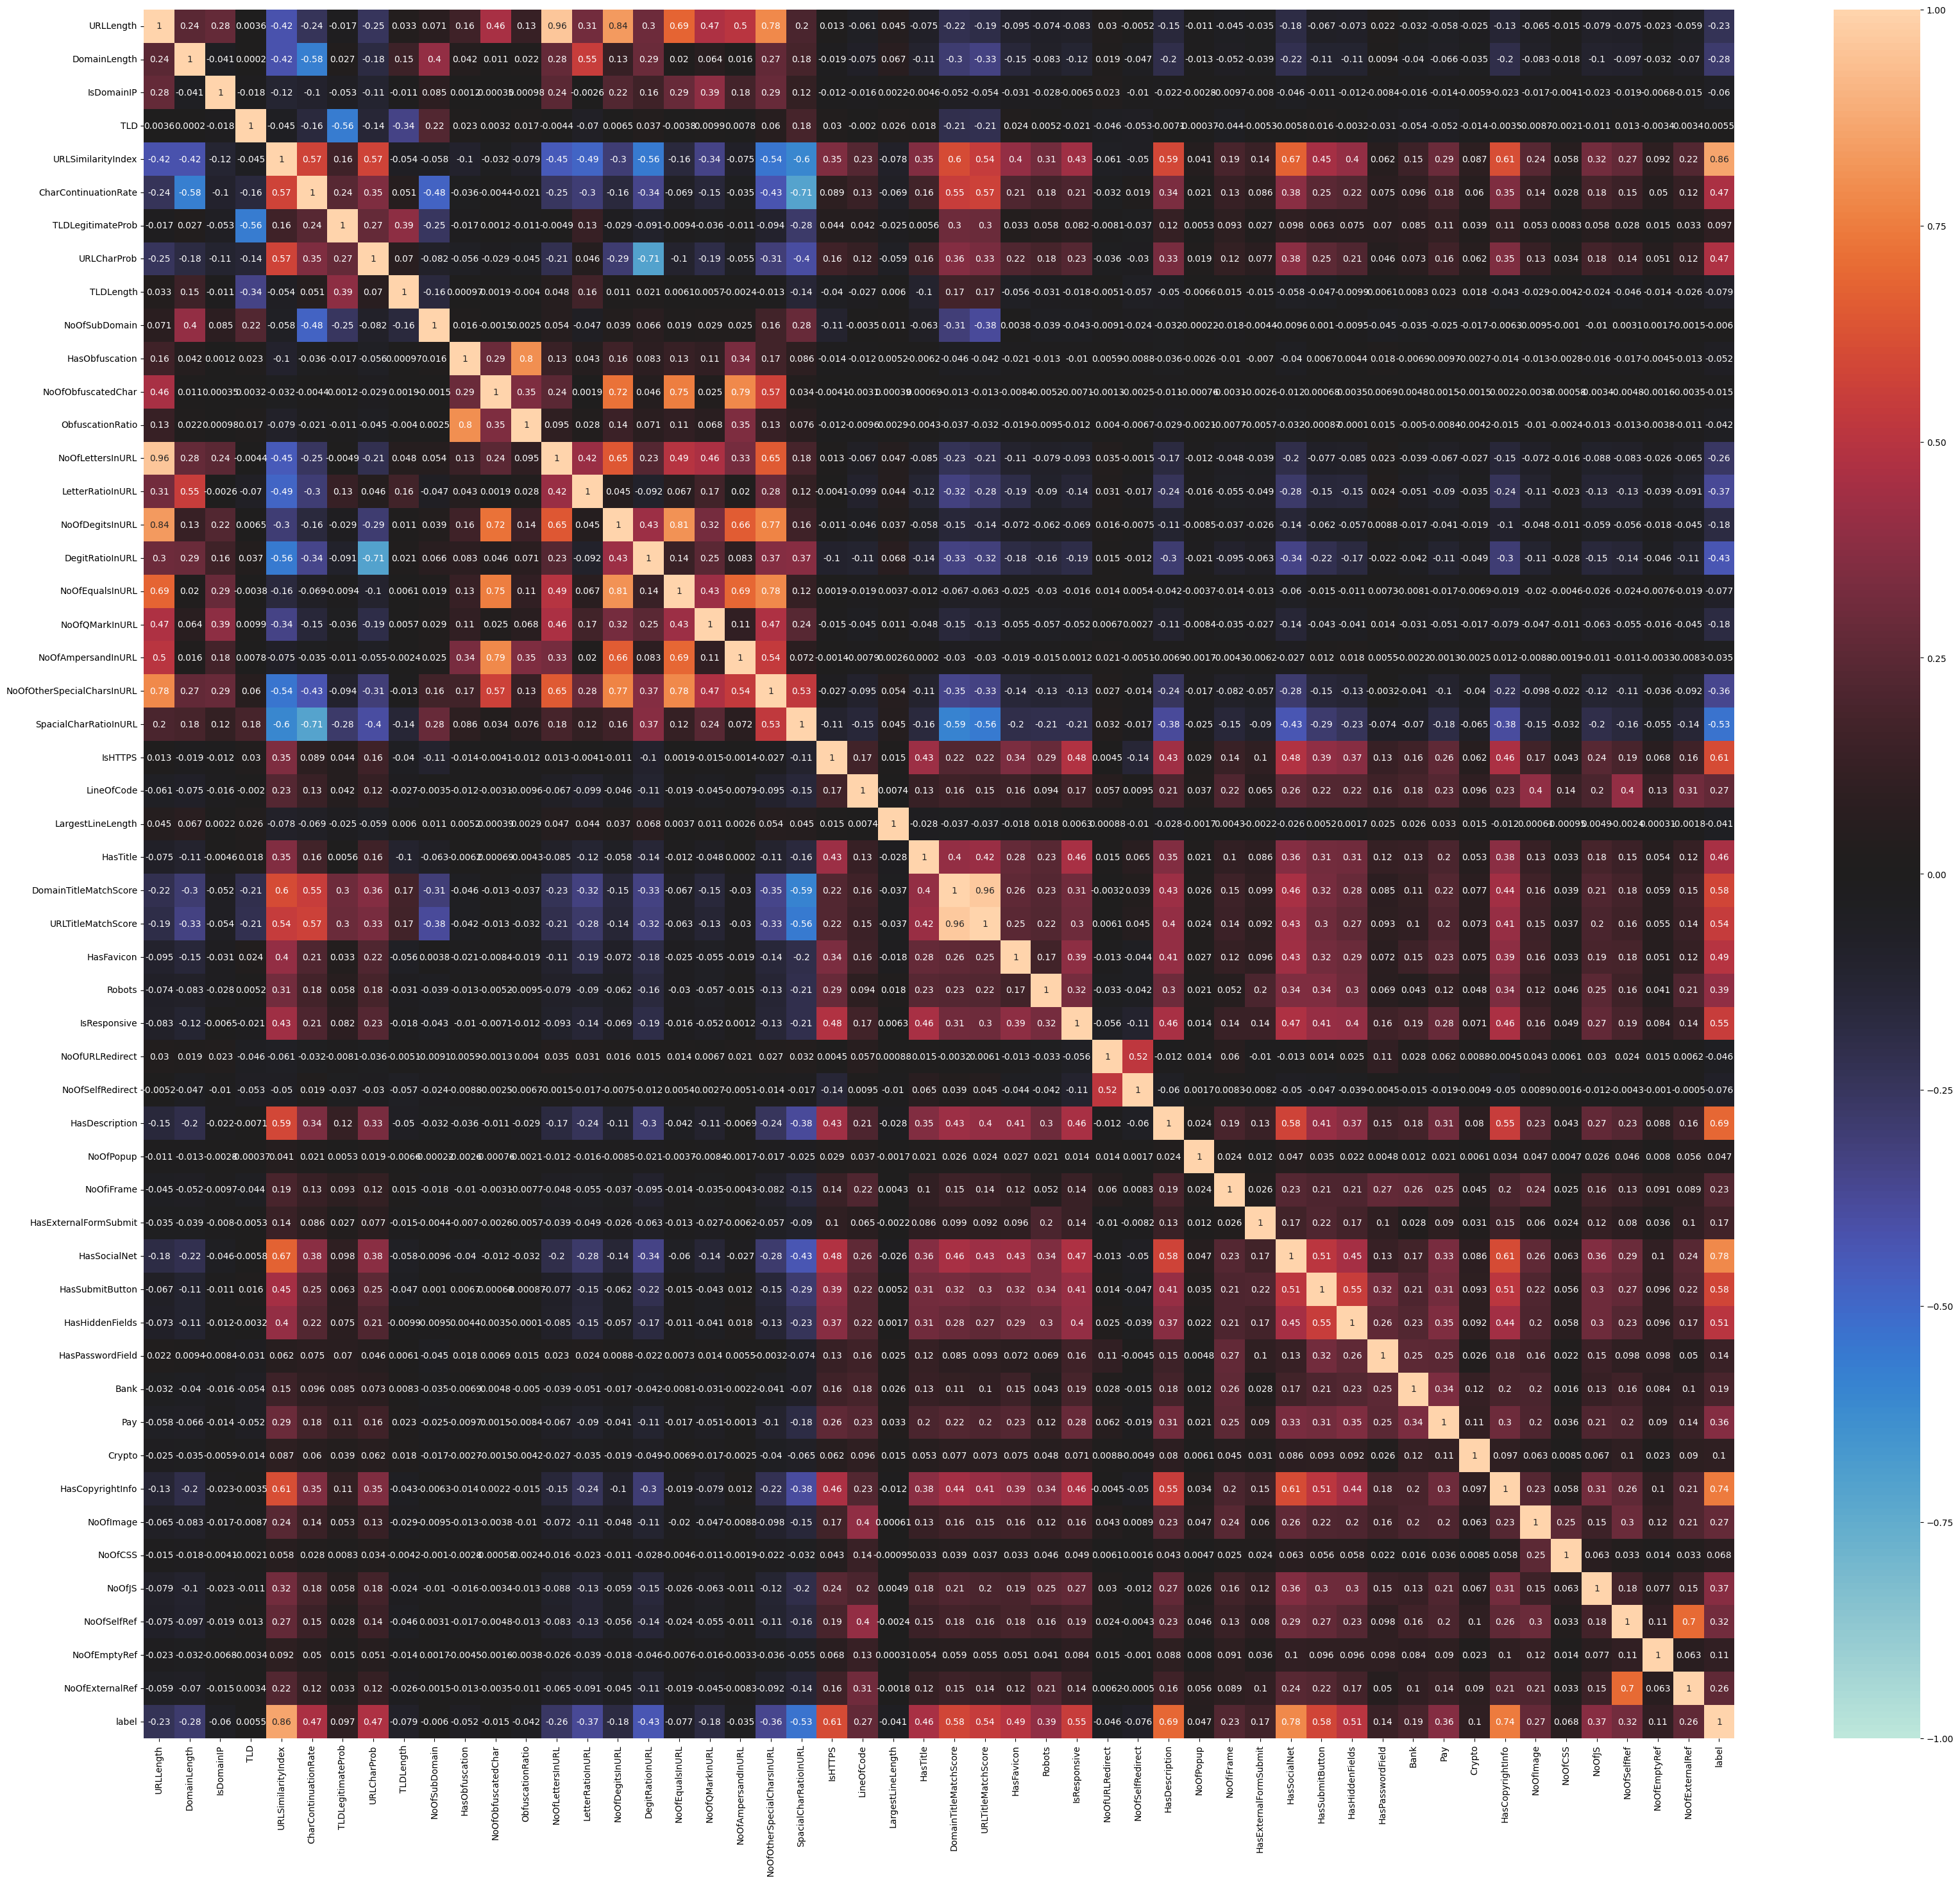

In [9]:
correlation = df.corr()

plt.figure(figsize=[40,35])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

#Splitting dataset

In [10]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 47159 entries, 173310 to 153247
Series name: label
Non-Null Count  Dtype
--------------  -----
47159 non-null  int64
dtypes: int64(1)
memory usage: 736.9 KB


label
1    134850
0    100945
Name: count, dtype: int64


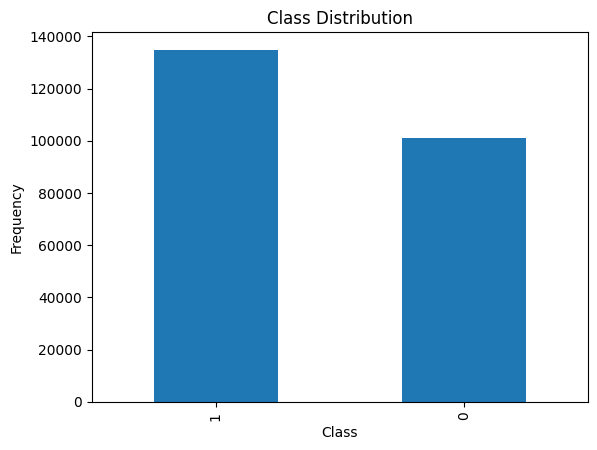

In [12]:
class_distribution = y.value_counts()

print(class_distribution)

import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [13]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("New Class Distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())

New Class Distribution after SMOTE:
 label
1    107880
0    107880
Name: count, dtype: int64


In [14]:
X_train = X_train_resampled
y_train = y_train_resampled

In [15]:
print(X_train.shape)
print(y_train.shape)

(215760, 51)
(215760,)


#Training

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  int64  
 4   URLSimilarityIndex          235795 non-null  float64
 5   CharContinuationRate        235795 non-null  float64
 6   TLDLegitimateProb           235795 non-null  float64
 7   URLCharProb                 235795 non-null  float64
 8   TLDLength                   235795 non-null  int64  
 9   NoOfSubDomain               235795 non-null  int64  
 10  HasObfuscation              235795 non-null  int64  
 11  NoOfObfuscatedChar          235795 non-null  int64  
 12  ObfuscationRatio            235795 non-null  float64
 13  NoOfLettersInU

In [17]:
X_train.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,24,17,0,0,100.000000,1.000000,0.522907,0.062244,3,1,0,0,0.0,11,0.458,0,0.0,0,0,0,1,0.042,1,1198,4153,1,100.0,100.0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,37,21,24,149,1,28
1,22,15,0,13,100.000000,0.750000,0.023045,0.067273,2,2,0,0,0.0,8,0.364,0,0.0,0,0,0,2,0.091,1,1886,3113,1,0.0,0.0,1,0,1,0,0,1,1,2,0,1,0,0,0,0,0,0,1,81,3,7,61,4,22
2,26,19,0,1,58.555556,1.000000,0.001766,0.057979,4,1,0,0,0.0,14,0.538,0,0.0,0,0,0,1,0.038,0,2,35,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,39,32,0,2,100.000000,0.666667,0.079963,0.057367,3,2,0,0,0.0,25,0.641,0,0.0,0,0,0,2,0.051,1,904,204,1,0.0,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,27,8,10,3,5,11
4,30,23,0,0,100.000000,0.600000,0.522907,0.062630,3,1,0,0,0.0,16,0.533,0,0.0,0,0,0,2,0.067,1,954,9381,1,100.0,100.0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,29,9,14,136,1,135


In [18]:
X_train.drop(columns=['CharContinuationRate', 'URLCharProb','DegitRatioInURL', 'HasTitle', 'HasFavicon', 'IsDomainIP','TLDLength','NoOfSubDomain','HasObfuscation','NoOfObfuscatedChar','NoOfLettersInURL',
    'LetterRatioInURL','NoOfDegitsInURL','NoOfEqualsInURL','NoOfQMarkInURL','NoOfAmpersandInURL','NoOfOtherSpecialCharsInURL','LineOfCode','LargestLineLength','Robots','NoOfURLRedirect',
    'NoOfSelfRedirect','NoOfPopup','NoOfiFrame','HasExternalFormSubmit','HasPasswordField','Bank','Pay','Crypto','HasCopyrightInfo','NoOfImage','NoOfCSS','NoOfJS','NoOfSelfRef','NoOfExternalRef'], inplace=True)

In [19]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


#new DataFrame for storing VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns

#Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

# Set a threshold for VIF
threshold = 10

# Iteratively drop features with high VIF
while True:
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    # Check if all VIF values are below the threshold
    if vif_data["VIF"].max() > threshold:
        # Drop the feature with the highest VIF
        feature_to_drop = vif_data.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        X_train = X_train.drop(columns=[feature_to_drop])
        print(f"Dropped {feature_to_drop} due to high VIF")
    else:
        break

print("Final Features with acceptable VIF:\n", X_train.columns)

                  Feature        VIF
0               URLLength   2.091188
1            DomainLength   5.782981
2                     TLD   1.987578
3      URLSimilarityIndex  11.788926
4       TLDLegitimateProb   3.173184
5        ObfuscationRatio   1.023764
6   SpacialCharRatioInURL   5.479668
7                 IsHTTPS   6.293335
8   DomainTitleMatchScore  24.648339
9      URLTitleMatchScore  22.808580
10           IsResponsive   3.858389
11         HasDescription   3.139746
12           HasSocialNet   4.100029
13        HasSubmitButton   2.847020
14        HasHiddenFields   2.486293
15           NoOfEmptyRef   1.031519
Dropped DomainTitleMatchScore due to high VIF
Dropped URLSimilarityIndex due to high VIF
Final Features with acceptable VIF:
 Index(['URLLength', 'DomainLength', 'TLD', 'TLDLegitimateProb',
       'ObfuscationRatio', 'SpacialCharRatioInURL', 'IsHTTPS',
       'URLTitleMatchScore', 'IsResponsive', 'HasDescription', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFie

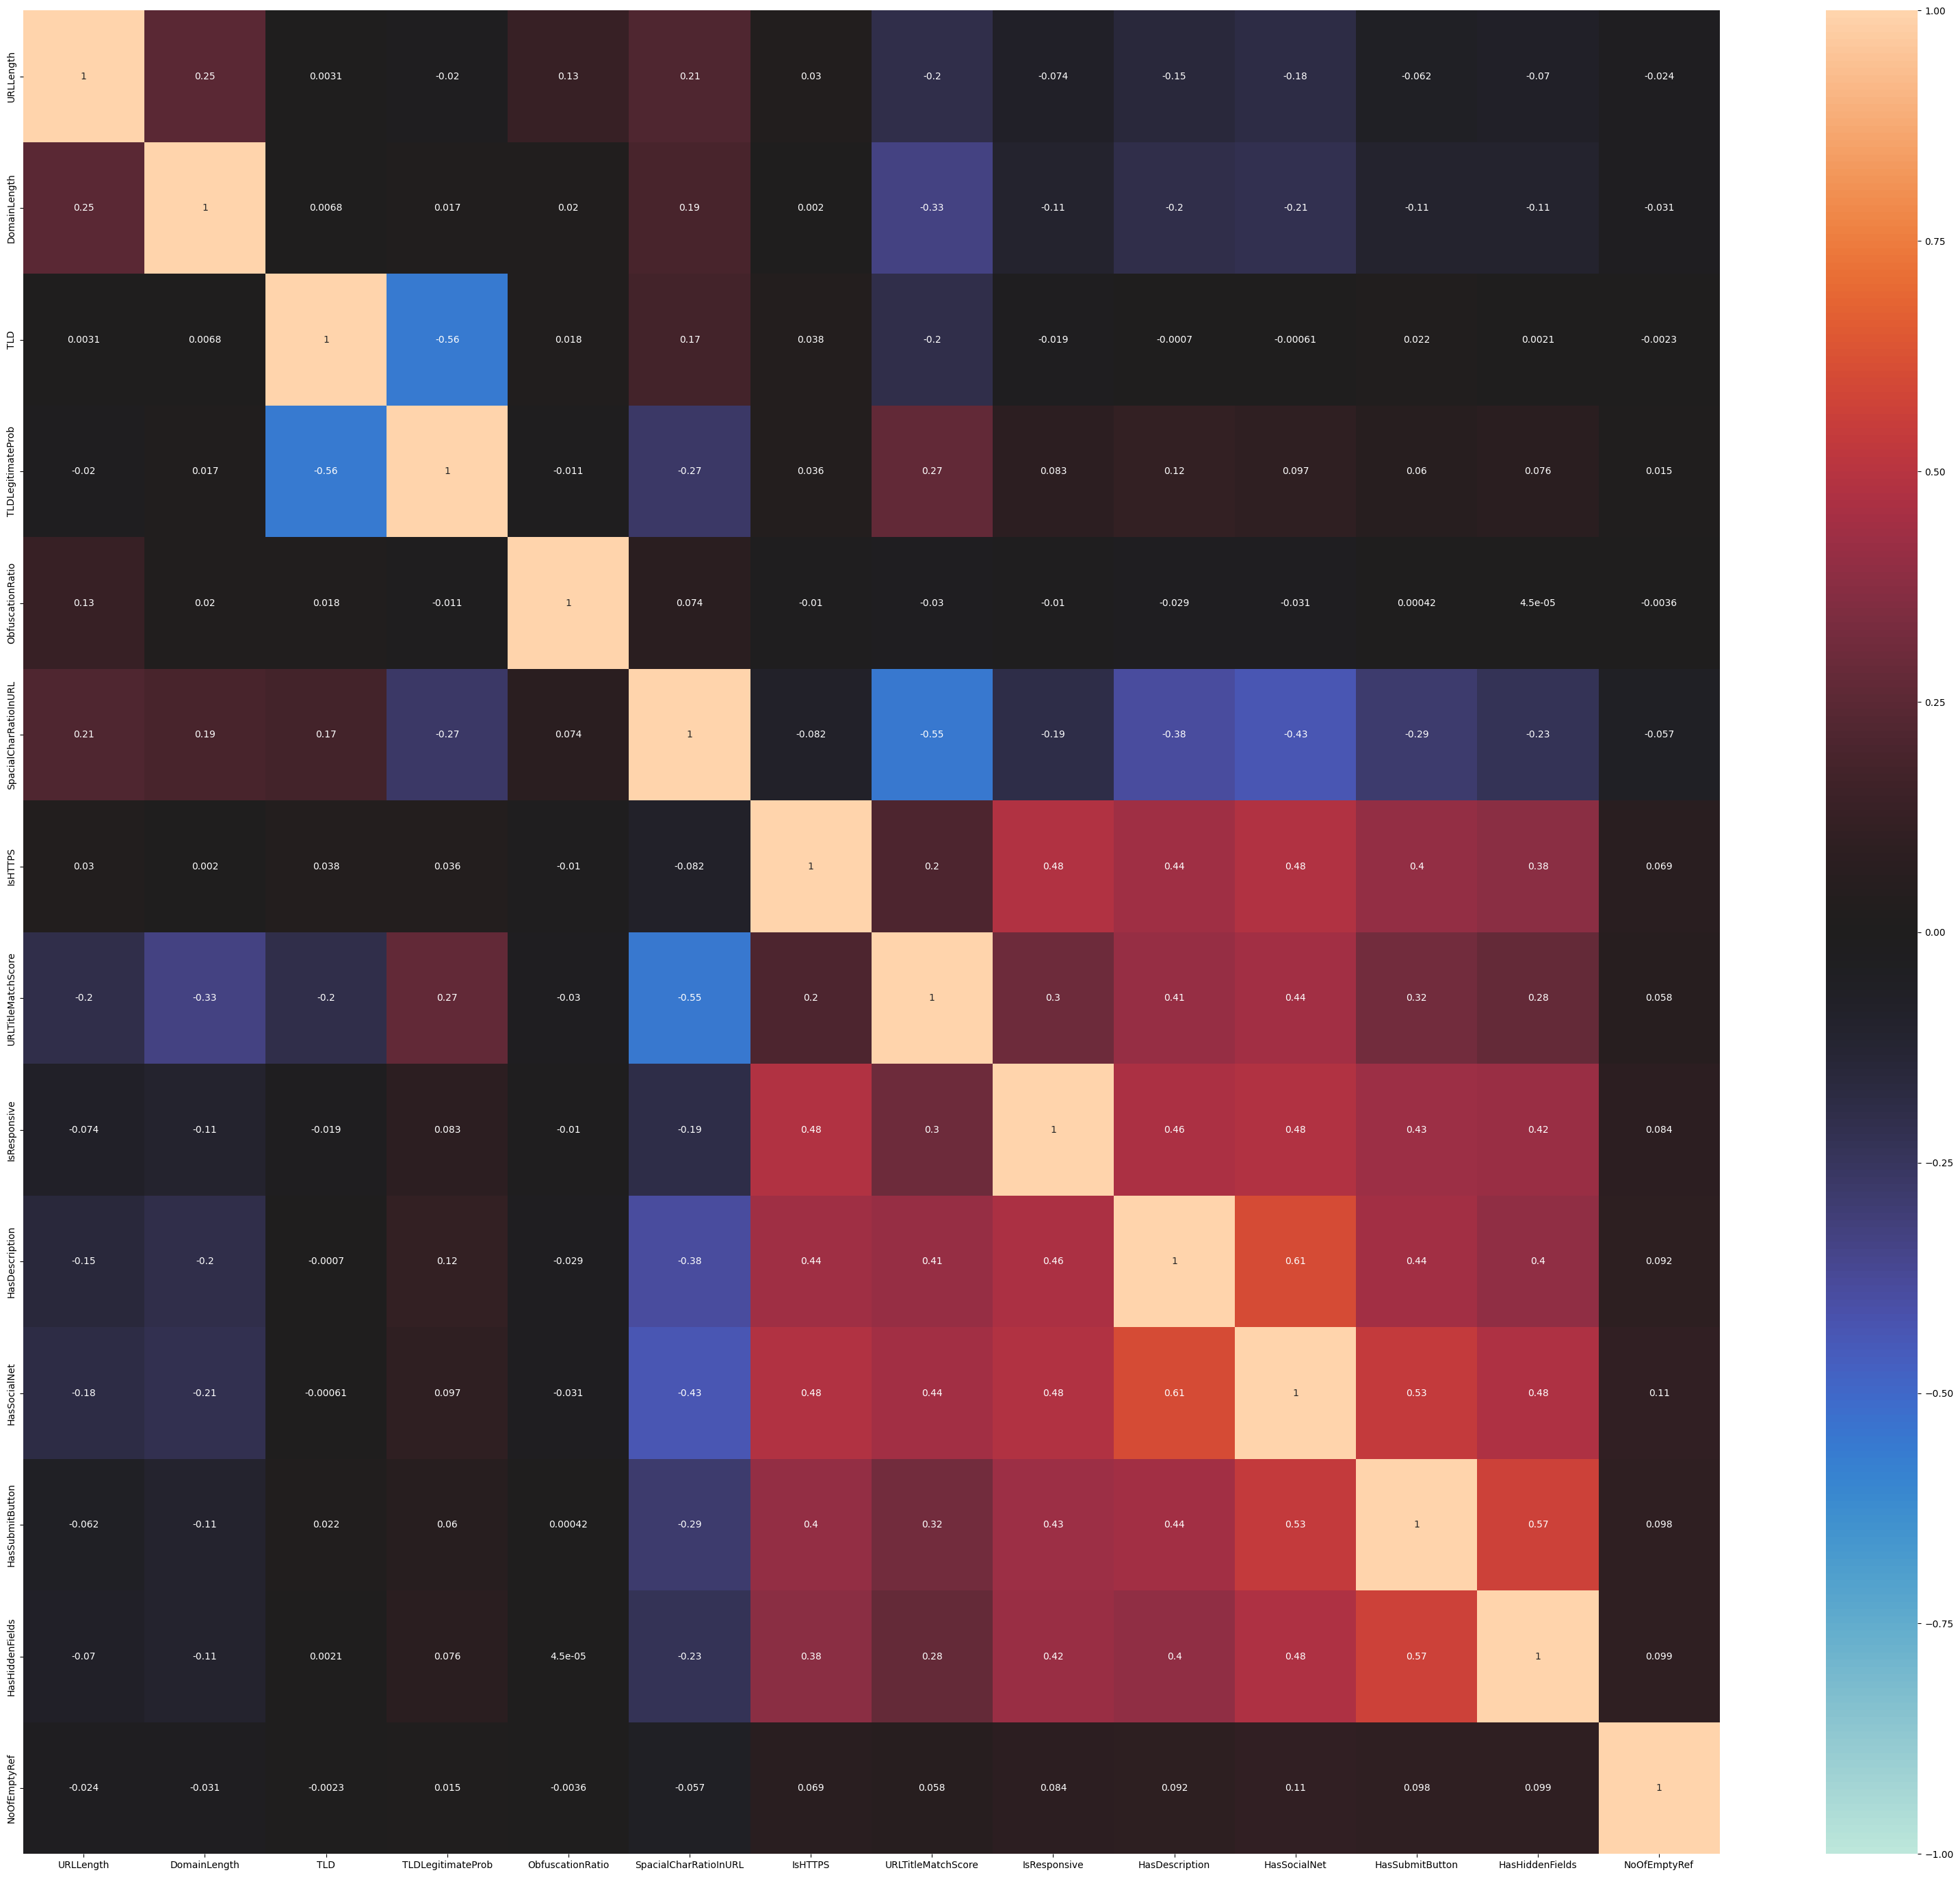

In [20]:
correlation = X_train.corr()

plt.figure(figsize=[40,35])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [21]:
# Take the absolute value of each element in the correlation matrix
abs_corr_matrix = correlation.abs()

# Exclude the diagonal values by creating a mask
np.fill_diagonal(abs_corr_matrix.values, np.nan)

# Calculate the mean of the non-diagonal absolute values
mean_absolute_correlation = abs_corr_matrix.mean().mean()

print("Mean Absolute Correlation:", mean_absolute_correlation)

Mean Absolute Correlation: 0.1844631313482039


In [22]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Create new DataFrames from the scaled data with the original column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [23]:
X_train.head()

,URLLength,DomainLength,TLD,TLDLegitimateProb,ObfuscationRatio,SpacialCharRatioInURL,IsHTTPS,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,NoOfEmptyRef
0,-0.284757,-0.501796,-0.585402,1.060653,-0.039202,-0.716791,0.593573,1.044735,0.844502,1.253892,1.226900,1.301048,1.393109,-0.064065
1,-0.332635,-0.710423,2.368114,-0.933240,-0.039202,0.758502,0.593573,-0.971318,0.844502,1.253892,1.226900,-0.768611,-0.717819,0.109166
2,-0.236880,-0.293169,-0.358209,-1.018122,-0.039202,-0.837223,-1.684713,-0.971318,-1.184130,-0.797517,-0.815062,-0.768611,-0.717819,-0.121809
3,0.074324,1.062905,-0.131015,-0.706202,-0.039202,-0.445819,0.593573,-0.971318,0.844502,1.253892,1.226900,-0.768611,-0.717819,0.166910
4,-0.141124,0.124084,-0.585402,1.060653,-0.039202,0.035909,0.593573,1.044735,-1.184130,1.253892,-0.815062,1.301048,1.393109,-0.064065


#Testing

In [24]:
X_test.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
173310,25,18,0,0,100.0,1.000000,0.522907,0.063855,3,1,0,0,0.0,12,0.480,0,0.0,0,0,0,1,0.040,1,978,13968,1,100.0,100.0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,16,12,29,65,0,11
62486,25,18,0,1,100.0,0.727273,0.003322,0.048722,2,2,0,0,0.0,11,0.440,0,0.0,0,0,0,2,0.080,1,977,253,1,0.0,0.0,0,0,1,1,1,1,3,0,0,0,0,0,0,0,0,0,0,62,6,8,121,0,127
14858,24,17,0,0,100.0,1.000000,0.522907,0.063283,3,1,0,0,0.0,11,0.458,0,0.0,0,0,0,1,0.042,1,1957,21235,1,100.0,100.0,1,1,0,1,1,0,0,4,0,1,1,1,0,0,0,0,1,9,7,12,6,0,6
82943,32,25,0,0,100.0,1.000000,0.522907,0.056111,3,1,0,0,0.0,19,0.594,0,0.0,0,0,0,1,0.031,1,10309,5665,1,100.0,100.0,0,0,1,1,0,1,5,0,0,1,1,0,1,1,1,0,1,64,5,5,1582,2,1590
72539,23,16,0,0,100.0,1.000000,0.522907,0.050065,3,1,0,0,0.0,10,0.435,0,0.0,0,0,0,1,0.043,1,2538,2673,1,75.0,75.0,1,0,1,0,0,1,0,19,0,0,1,1,1,1,1,0,1,35,3,22,103,0,9


In [25]:
X_test.drop(columns=['DomainTitleMatchScore', 'URLSimilarityIndex', 'CharContinuationRate', 'URLCharProb','DegitRatioInURL', 'HasTitle', 'HasFavicon', 'IsDomainIP','TLDLength','NoOfSubDomain','HasObfuscation','NoOfObfuscatedChar','NoOfLettersInURL',
    'LetterRatioInURL','NoOfDegitsInURL','NoOfEqualsInURL','NoOfQMarkInURL','NoOfAmpersandInURL','NoOfOtherSpecialCharsInURL','LineOfCode','LargestLineLength','Robots','NoOfURLRedirect',
    'NoOfSelfRedirect','NoOfPopup','NoOfiFrame','HasExternalFormSubmit','HasPasswordField','Bank','Pay','Crypto','HasCopyrightInfo','NoOfImage','NoOfCSS','NoOfJS','NoOfSelfRef','NoOfExternalRef'], inplace=True)

In [26]:
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
X_test.head()

,URLLength,DomainLength,TLD,TLDLegitimateProb,ObfuscationRatio,SpacialCharRatioInURL,IsHTTPS,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,NoOfEmptyRef
0,-0.260818,-0.397483,-0.585402,1.060653,-0.039202,-0.777007,0.593573,1.044735,0.844502,1.253892,1.226900,1.301048,1.393109,-0.121809
1,-0.260818,-0.397483,-0.358209,-1.011914,-0.039202,0.427314,0.593573,-0.971318,0.844502,1.253892,-0.815062,-0.768611,-0.717819,-0.121809
2,-0.284757,-0.501796,-0.585402,1.060653,-0.039202,-0.716791,0.593573,1.044735,-1.184130,-0.797517,1.226900,1.301048,1.393109,-0.121809
3,-0.093247,0.332711,-0.585402,1.060653,-0.039202,-1.047980,0.593573,1.044735,0.844502,1.253892,1.226900,1.301048,-0.717819,-0.006321
4,-0.308696,-0.606109,-0.585402,1.060653,-0.039202,-0.686683,0.593573,0.540722,0.844502,1.253892,-0.815062,1.301048,1.393109,-0.121809


In [28]:
print("Training features:", X_train.columns.tolist())
print("Testing features:", X_test.columns.tolist())

Training features: ['URLLength', 'DomainLength', 'TLD', 'TLDLegitimateProb', 'ObfuscationRatio', 'SpacialCharRatioInURL', 'IsHTTPS', 'URLTitleMatchScore', 'IsResponsive', 'HasDescription', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'NoOfEmptyRef']
Testing features: ['URLLength', 'DomainLength', 'TLD', 'TLDLegitimateProb', 'ObfuscationRatio', 'SpacialCharRatioInURL', 'IsHTTPS', 'URLTitleMatchScore', 'IsResponsive', 'HasDescription', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'NoOfEmptyRef']


#Logistic Regression

In [29]:
score_list = {}

In [30]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.9903941983502619

- Cross Validation on training data

In [31]:
scores = cross_val_score(lr_model, X_train, y_train, cv=10)
scores

array([0.98827401, 0.98896923, 0.98924731, 0.98971079, 0.99045235,
       0.99031331, 0.98947905, 0.99161105, 0.99202818, 0.99318687])

In [32]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.00


In [33]:
score_list["Logistic Regression Classifier"] = scores.mean()

- Test metrics

In [34]:
y_train_pred_lr = lr_model.predict(X_train)

train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_precision_lr = precision_score(y_train, y_train_pred_lr)
train_recall_lr = recall_score(y_train, y_train_pred_lr)
train_f1_score_lr = f1_score(y_train, y_train_pred_lr)

y_test_pred_lr = lr_model.predict(X_test)

test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr)
test_recall_lr = recall_score(y_test, y_test_pred_lr)
test_f1_score_lr = f1_score(y_test, y_test_pred_lr)

print(f"Training Accuracy: {train_accuracy_lr:.2f}")
print(f"Test Accuracy: {test_accuracy_lr:.2f}")
print()
print(f"Training Precision: {train_precision_lr:.2f}")
print(f"Test Precision: {test_precision_lr:.2f}")
print()
print(f"Training Recall: {train_recall_lr:.2f}")
print(f"Test Recall: {test_recall_lr:.2f}")
print()
print(f"Training F1 Score: {train_f1_score_lr:.2f}")
print(f"Test F1 Score: {test_f1_score_lr:.2f}")

Training Accuracy: 0.99
Test Accuracy: 0.99

Training Precision: 0.99
Test Precision: 0.99

Training Recall: 0.99
Test Recall: 0.99

Training F1 Score: 0.99
Test F1 Score: 0.99


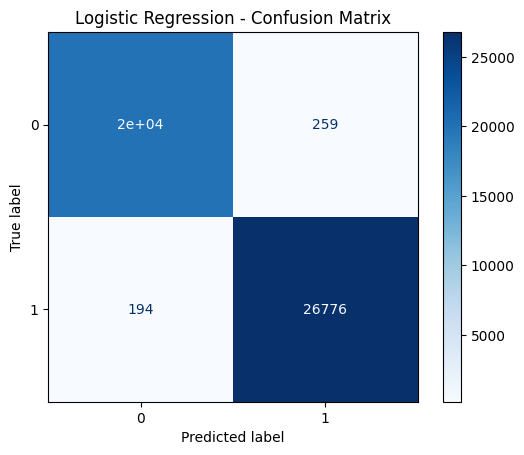

In [35]:
cm_lr = confusion_matrix(y_test, y_test_pred_lr)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0, 1])

disp_lr.plot(cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()


#Random Forest

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9790495981679

- Cross Validation on training data

In [37]:
scores = cross_val_score(rf_model, X_train, y_train, cv=10)
scores

array([0.97979236, 0.97993141, 0.98058027, 0.98113645, 0.98044123,
       0.98150723, 0.97886541, 0.98289766, 0.98331479, 0.98553949])

In [38]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.00


In [39]:
score_list["Random Forest Classifier"] = scores.mean()

- Test metrics

In [40]:
y_train_pred_rf = rf_model.predict(X_train)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_score_rf = f1_score(y_train, y_train_pred_rf)

y_test_pred_rf = rf_model.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_score_rf = f1_score(y_test, y_test_pred_rf)

print(f"Training Accuracy: {train_accuracy_rf:.2f}")
print(f"Test Accuracy: {test_accuracy_rf:.2f}")
print()
print(f"Training Precision: {train_precision_rf:.2f}")
print(f"Test Precision: {test_precision_rf:.2f}")
print()
print(f"Training Recall: {train_recall_rf:.2f}")
print(f"Test Recall: {test_recall_rf:.2f}")
print()
print(f"Training F1 Score: {train_f1_score_rf:.2f}")
print(f"Test F1 Score: {test_f1_score_rf:.2f}")



Training Accuracy: 0.98
Test Accuracy: 0.98

Training Precision: 0.99
Test Precision: 0.99

Training Recall: 0.98
Test Recall: 0.98

Training F1 Score: 0.98
Test F1 Score: 0.98


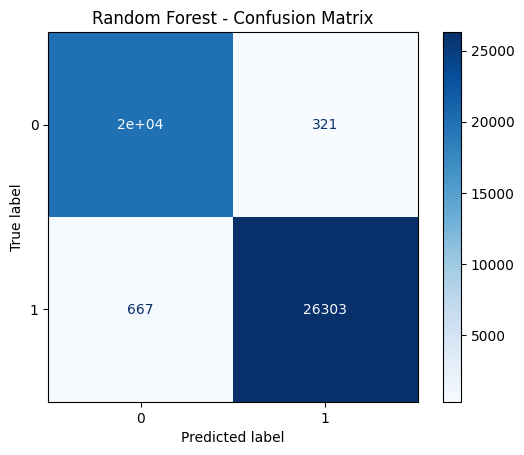

In [41]:
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])

disp_rf.plot(cmap="Blues")
plt.title('Random Forest - Confusion Matrix')
plt.show()


#Naive Bayes

In [42]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test, y_test)

0.8941877478318031

In [43]:
scores = cross_val_score(nb_model, X_train, y_train, cv=10)
scores

array([0.87787356, 0.87982017, 0.87838339, 0.87741009, 0.87754913,
       0.87935669, 0.87578791, 0.88311086, 0.89469781, 0.89432703])

In [44]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.01


In [45]:
score_list["Naive Bayes Classifier"] = scores.mean()

- Test Metrics

In [46]:
y_train_pred_nb = nb_model.predict(X_train)

train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
train_precision_nb = precision_score(y_train, y_train_pred_nb)
train_recall_nb = recall_score(y_train, y_train_pred_nb)
train_f1_score_nb = f1_score(y_train, y_train_pred_nb)

y_test_pred_nb = nb_model.predict(X_test)

test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
test_precision_nb = precision_score(y_test, y_test_pred_nb)
test_recall_nb = recall_score(y_test, y_test_pred_nb)
test_f1_score_nb = f1_score(y_test, y_test_pred_nb)

print(f"Training Accuracy: {train_accuracy_nb:.2f}")
print(f"Test Accuracy: {test_accuracy_nb:.2f}")
print()
print(f"Training Precision: {train_precision_nb:.2f}")
print(f"Test Precision: {test_precision_nb:.2f}")
print()
print(f"Training Recall: {train_recall_nb:.2f}")
print(f"Test Recall: {test_recall_nb:.2f}")
print()
print(f"Training F1 Score: {train_f1_score_nb:.2f}")
print(f"Test F1 Score: {test_f1_score_nb:.2f}")

Training Accuracy: 0.88
Test Accuracy: 0.89

Training Precision: 0.81
Test Precision: 0.84

Training Recall: 1.00
Test Recall: 1.00

Training F1 Score: 0.89
Test F1 Score: 0.92


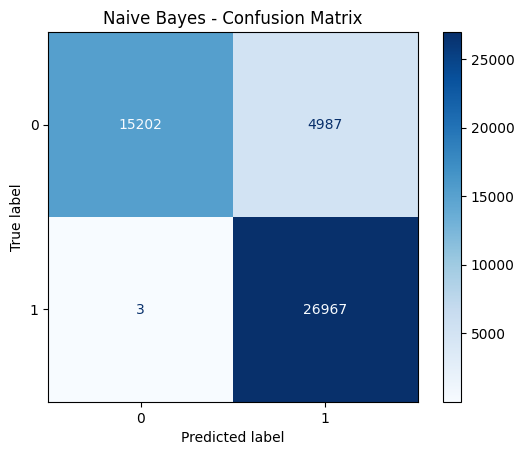

In [47]:
cm_nb = confusion_matrix(y_test, y_test_pred_nb)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=[0, 1])

disp_nb.plot(cmap="Blues")
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

#SVM

In [48]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

0.9917301045399606

In [49]:
scores = cross_val_score(svc_model, X_train, y_train, cv=10)
scores

array([0.99068409, 0.9904987 , 0.99022062, 0.99114757, 0.99193548,
       0.99221357, 0.9905914 , 0.99276974, 0.99392844, 0.99443826])

In [50]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.00


In [51]:
score_list["SVM Classifier"] = scores.mean()

- Test Metrics

In [52]:
y_train_pred_svc = svc_model.predict(X_train)

train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
train_precision_svc = precision_score(y_train, y_train_pred_svc)
train_recall_svc = recall_score(y_train, y_train_pred_svc)
train_f1_score_svc = f1_score(y_train, y_train_pred_svc)

y_test_pred_svc = svc_model.predict(X_test)

test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
test_precision_svc = precision_score(y_test, y_test_pred_svc)
test_recall_svc = recall_score(y_test, y_test_pred_svc)
test_f1_score_svc = f1_score(y_test, y_test_pred_svc)

print(f"Training Accuracy: {train_accuracy_svc:.2f}")
print(f"Test Accuracy: {test_accuracy_svc:.2f}")
print()
print(f"Training Precision: {train_precision_svc:.2f}")
print(f"Test Precision: {test_precision_svc:.2f}")
print()
print(f"Training Recall: {train_recall_svc:.2f}")
print(f"Test Recall: {test_recall_svc:.2f}")
print()
print(f"Training F1 Score: {train_f1_score_svc:.2f}")
print(f"Test F1 Score: {test_f1_score_svc:.2f}")

Training Accuracy: 0.99
Test Accuracy: 0.99

Training Precision: 0.99
Test Precision: 0.99

Training Recall: 0.99
Test Recall: 0.99

Training F1 Score: 0.99
Test F1 Score: 0.99


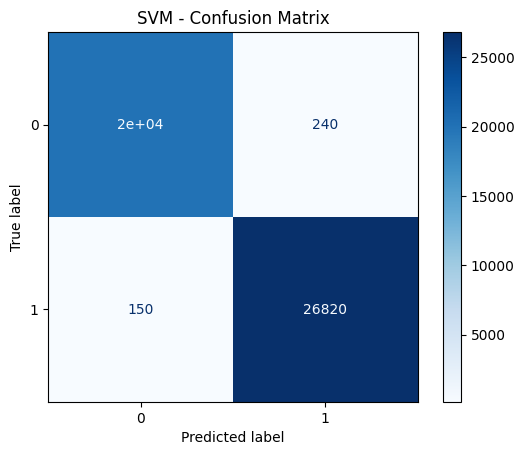

In [53]:
cm_svc = confusion_matrix(y_test, y_test_pred_svc)

disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=[0, 1])

disp_svc.plot(cmap="Blues")
plt.title('SVM - Confusion Matrix')
plt.show()

# Compare all

In [54]:
score_list = list(score_list.items())

for alg,score in score_list:
    print(f"{alg} Score is {score:.3f}")


Logistic Regression Classifier Score is 0.990
Random Forest Classifier Score is 0.981
Naive Bayes Classifier Score is 0.882
SVM Classifier Score is 0.992


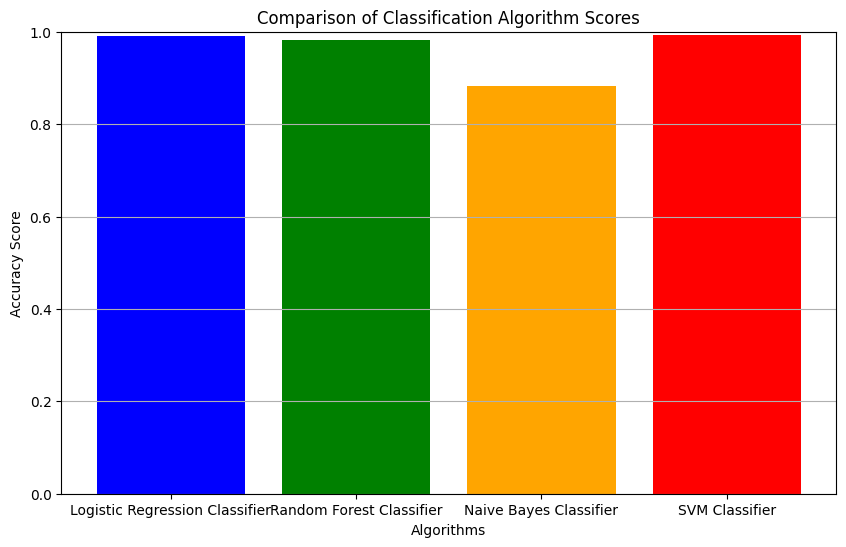

In [55]:
algorithms = [alg for alg, _ in score_list]  # Extract algorithm names
scores = [score for _, score in score_list]  # Extract scores


plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(algorithms, scores, color=['blue', 'green', 'orange', 'red'])

plt.title('Comparison of Classification Algorithm Scores')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')

plt.grid(axis='y')

plt.ylim(0, 1)
plt.show()